In [2]:
import random 
import numpy  as np

### Problema abordado
1. Aprendizado supervisioando de regressão multivariada 
2. Aprendizado em batch já que pegarei os dados farei todo o processor de treinamento e colocarei para produção

In [3]:
x = np.random.rand(100,1)*100
y = np.random.randn(100,1)*100

### Erro quadratico medio

$RMSE(X,h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1}{h(x^{(i)} - y^{(i)})}}$

In [4]:
def Mean_Squared_Error(pred,y,squared=True):
    rmse = (1/np.size(y))*np.sum(pred-y)
    if (squared):
        return np.sqrt(rmse)
    return rmse

In [5]:
Mean_Squared_Error(x,y)

6.8591706142210125

### Erro Absoluto Medio
$MAE(X,h) = \frac{1}{m} \cdot \sum^{m}_{i=1} | h(x^{(i)} - y^{(i)})|$

In [6]:
def Mean_Absolute_Error(pred,y):
    return (1/np.size(y))*abs(np.sum(pred-y))

In [7]:
Mean_Absolute_Error(x,y)

47.04822151499306

### R2

$\large R2(pred,ytrue) = 1-\frac{\sum^{m}_{i=1}({ytrue^{i} - pred^{i})^{2}}}{{\sum^{m}_{i=1}} ({ytrue^{i} - ytrue_{mean})^{2}} }$

In [8]:
def R2(pred,y):
    mean = np.mean(y)
    sum1 = sum2 = 0
    for i in range(np.size(pred)):
        sum1 += (y[i] - pred[i])**2
    for i in range(np.size(pred)):
        sum2 += (y[i] - mean)**2
    return abs(1 - (sum1/sum2))

In [9]:
R2(x,y)

array([0.32405521])

&nbsp;

### Problema

In [10]:
import copy
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv(r'dataset/housing.csv',sep=',')

In [12]:
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


&nbsp;

## Analise dos dados

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
data.isna().nunique()

longitude             1
latitude              1
housing_median_age    1
total_rooms           1
total_bedrooms        2
population            1
households            1
median_income         1
median_house_value    1
ocean_proximity       1
dtype: int64

> `total_bedrooms` possuem valores nulos , pré-processamento será necessario imputar dados
* SimpleImputer | Interative Inputer

In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


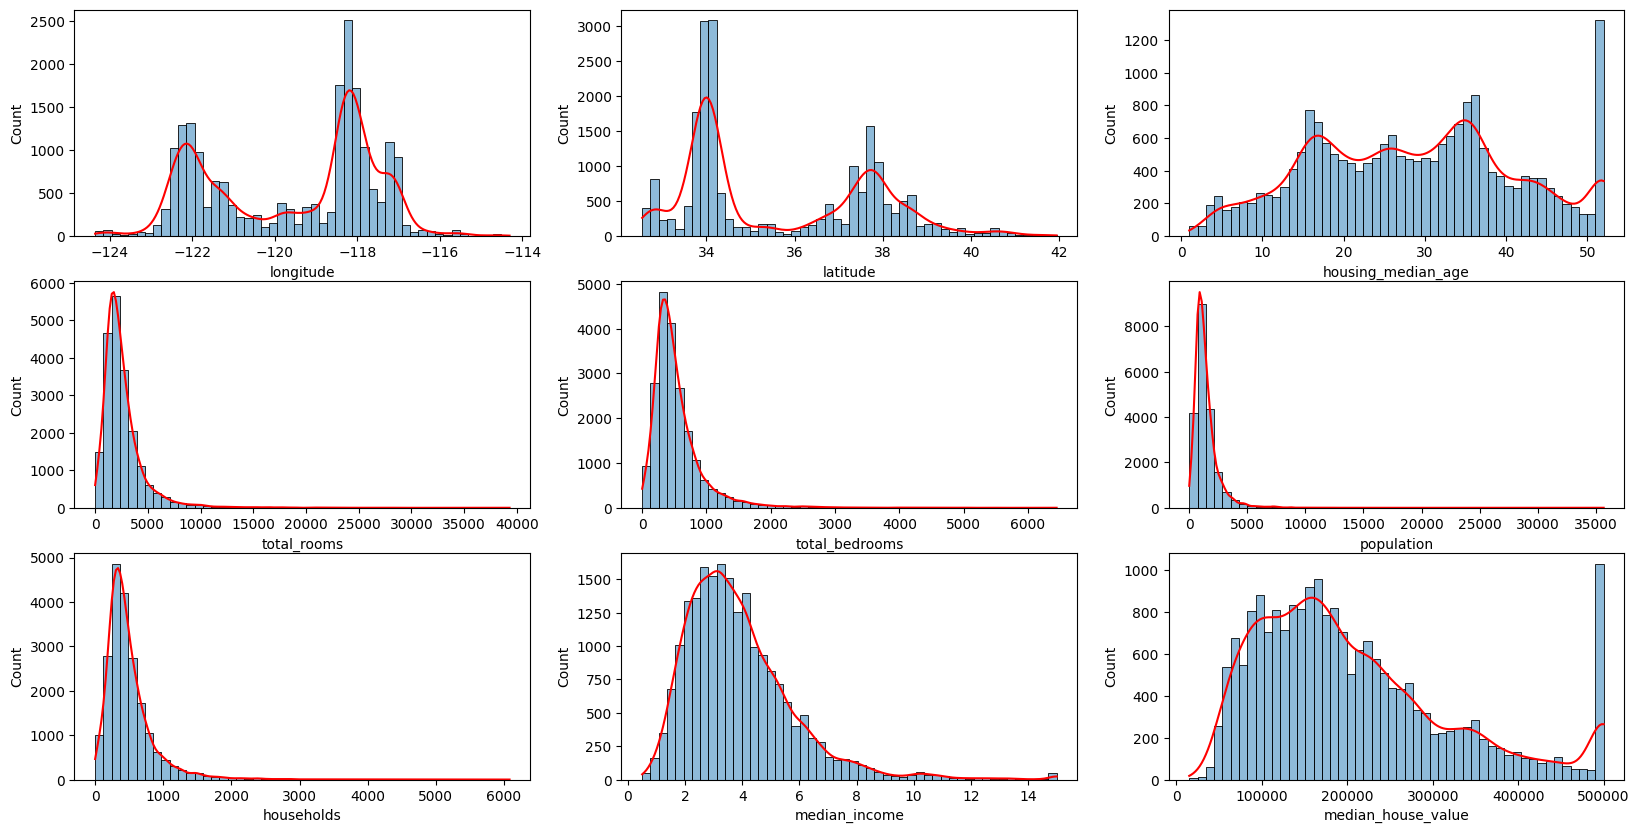

In [31]:
fig , axis = plt.subplots(3,3,figsize=(20,10))
columns    = data.select_dtypes(exclude=['object']).columns
for ax, column in zip(axis.flatten(),columns):
    hist = sea.histplot(data[column],ax=ax,bins=50,kde=True)
    hist.lines[0].set_color('red')
plt.show()

> Atributos com calda longa